In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib
import os

In [88]:
# Multiple Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [75]:
# Create directory for models if it doesn't exist
os.makedirs("train_models", exist_ok=True)


In [76]:
# Loading the dataset
df = pd.read_csv("dataset/survey_lung_cancer.csv")
print("Original data shape:", df.shape)
print("\nFirst few rows:")
print(df.head())

Original data shape: (309, 16)

First few rows:
  GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0      M   69        1               2        2              1   
1      M   74        2               1        1              1   
2      F   59        1               1        1              2   
3      M   63        2               2        2              1   
4      F   63        1               2        1              1   

   CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0                1         2         1         2                  2         2   
1                2         2         2         1                  1         1   
2                1         2         1         2                  1         2   
3                1         1         1         1                  2         1   
4                1         1         1         2                  1         2   

   SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN LUNG_CANCE

In [77]:
# Data cleaning and standardization on the column names
df.columns = [c.strip().lower().replace(" ", "_") for c in df.columns]
df.rename(columns={"lung_cancer": "target"}, inplace=True)

print("\n" + "="*60)
print("ENCODING DATA")
print("="*60)


ENCODING DATA


In [78]:
categorical_columns = ['gender', 'smoking', 'yellow_fingers', 'anxiety', 
                       'peer_pressure', 'chronic_disease', 'fatigue', 
                       'allergy', 'wheezing', 'alcohol_consuming', 
                       'coughing', 'shortness_of_breath', 
                       'swallowing_difficulty', 'chest_pain', 'target']

In [79]:
# ✅ SOLUTION: Save each encoder separately
encoders = {}
for col in df.columns:
    if col in categorical_columns:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        encoders[col] = le
    # Age stays as numeric - no encoding needed


In [80]:
# Print the mappings so you can see them
print("\n📋 Encoding Mappings:")
for col, encoder in encoders.items():
    mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
    print(f"{col}: {mapping}")
print(f"age: [numeric - no encoding]")

print("\nEncoded data:")
print(df.head())


📋 Encoding Mappings:
gender: {'F': np.int64(0), 'M': np.int64(1)}
smoking: {np.int64(1): np.int64(0), np.int64(2): np.int64(1)}
yellow_fingers: {np.int64(1): np.int64(0), np.int64(2): np.int64(1)}
anxiety: {np.int64(1): np.int64(0), np.int64(2): np.int64(1)}
peer_pressure: {np.int64(1): np.int64(0), np.int64(2): np.int64(1)}
chronic_disease: {np.int64(1): np.int64(0), np.int64(2): np.int64(1)}
fatigue: {np.int64(1): np.int64(0), np.int64(2): np.int64(1)}
allergy: {np.int64(1): np.int64(0), np.int64(2): np.int64(1)}
wheezing: {np.int64(1): np.int64(0), np.int64(2): np.int64(1)}
alcohol_consuming: {np.int64(1): np.int64(0), np.int64(2): np.int64(1)}
coughing: {np.int64(1): np.int64(0), np.int64(2): np.int64(1)}
shortness_of_breath: {np.int64(1): np.int64(0), np.int64(2): np.int64(1)}
swallowing_difficulty: {np.int64(1): np.int64(0), np.int64(2): np.int64(1)}
chest_pain: {np.int64(1): np.int64(0), np.int64(2): np.int64(1)}
target: {'NO': np.int64(0), 'YES': np.int64(1)}
age: [numeric - n

In [81]:
# Separate features from target
X = df.drop('target', axis=1)
y = df['target']
print("\n" + "="*60)
print("DATASET SPLIT")
print("="*60)
print("Feature shape:", X.shape)
print("Target shape:", y.shape)
print("Target distribution:")
print(y.value_counts())


DATASET SPLIT
Feature shape: (309, 15)
Target shape: (309,)
Target distribution:
target
1    270
0     39
Name: count, dtype: int64


In [82]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)
print("\nTrain size:", X_train.shape)
print("Test size:", X_test.shape)


Train size: (231, 15)
Test size: (78, 15)


StandardScaler transforms your features to have zero mean and unit variance, putting all variables on the same scale for machine learning.
- StandardScaler: Most common, assumes normal distribution
- MinMaxScaler: When you need specific bounds (e.g., for neural networks)
- RobustScaler: When your cancer data has outliers or isn't normally distributed

In [83]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [84]:
print("\n" + "="*60)
print("TRAINING MODEL")
print("="*60)

# Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)


TRAINING MODEL


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [85]:
# Predictions
y_pred = model.predict(X_test_scaled)

# Evaluation
print("\n✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred))


✅ Accuracy: 0.9102564102564102

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.70      0.67        10
           1       0.96      0.94      0.95        68

    accuracy                           0.91        78
   macro avg       0.80      0.82      0.81        78
weighted avg       0.91      0.91      0.91        78




📊 Confusion matrix saved as 'train_models/confusion_matrix.png'


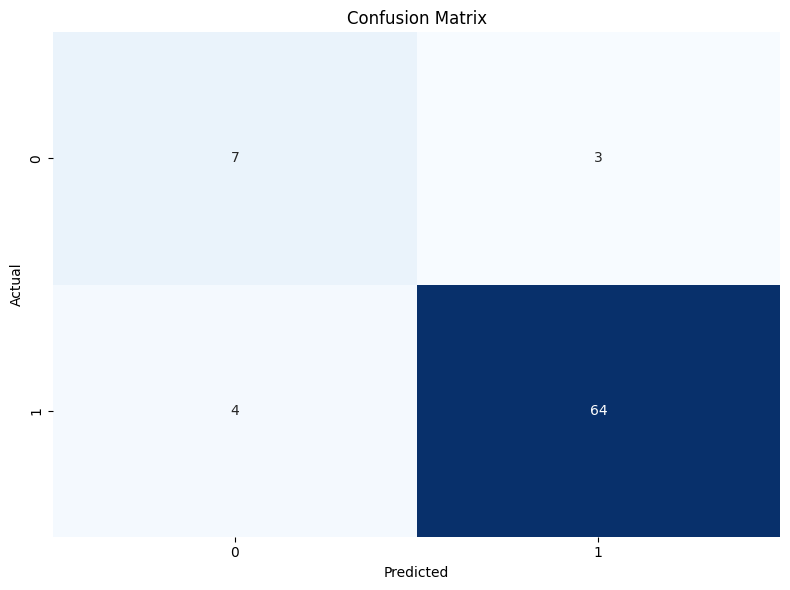

In [86]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.savefig("train_models/confusion_matrix.png")
print("\n📊 Confusion matrix saved as 'train_models/confusion_matrix.png'")
plt.show()

**Why Two Models Are Needed:**
So scaler is the data preparation helper that makes data ready for the main model!
1. **`lung_cancer_model.pkl`** - Main prediction model
   - Makes actual cancer predictions
   - Contains learned patterns from training data

2. **`scaler.pkl`** - Data preprocessor  
   - Converts new data to same scale as training data
   - Ensures model gets consistent input format

**They work together:**
```python
New Data → Scaler → Scaled Data → Model → Prediction
```

**Without scaler:** Model performance drops because it expects scaled inputs but gets raw data.

In [87]:
print("\n" + "="*60)
print("SAVING MODEL AND ENCODERS")
print("="*60)

# Save model, scaler, and encoders
joblib.dump(model, "train_models/lung_cancer_model.pkl")
joblib.dump(scaler, "train_models/scaler.pkl")
joblib.dump(encoders, "train_models/encoders.pkl")

print("✅ Model saved: train_models/lung_cancer_model.pkl")
print("✅ Scaler saved: train_models/scaler.pkl")
print("✅ Encoders saved: train_models/encoders.pkl")
print("\n🎉 Training completed successfully!")


SAVING MODEL AND ENCODERS
✅ Model saved: train_models/lung_cancer_model.pkl
✅ Scaler saved: train_models/scaler.pkl
✅ Encoders saved: train_models/encoders.pkl

🎉 Training completed successfully!
